# Eigenbases

We've learned that any set of two linearly independent vectors can form a **basis** for the 2D plane. We've also seen that a matrix acts as a **linear transformation** that can be thought of as a "change of basis."

For example, the standard basis vectors $\hat{i}=(1,0)$ and $\hat{j}=(0,1)$ form a unit square. A transformation matrix tells us where these basis vectors land, warping the square into a parallelogram and defining a new coordinate system.

Let's consider the transformation matrix:

$ A = \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} $  

This matrix transforms the standard basis as follows:
* $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ is sent to $\begin{bmatrix} 2 \\ 0 \end{bmatrix}$.
* $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ is sent to $\begin{bmatrix} 1 \\ 3 \end{bmatrix}$.

The unit square is transformed into a parallelogram. While this is a valid change of basis, the choice of the standard basis was arbitrary. Is there a more "natural" or "special" basis for this specific transformation?

---

## Finding a Special Basis: The Eigenbasis

Let's see what happens if we choose a different basis for our input space. Let's pick the basis formed by the vectors $v_1 = (1, 0)$ and $v_2 = (1, 1)$.

Now, let's apply our transformation matrix `A` to these new basis vectors:

* **Transforming $v_1$:** $ \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix} $

* **Transforming $v_2$:** $ \begin{bmatrix} 2 & 1 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \end{bmatrix} $

Notice something remarkable:
* The vector $(1, 0)$ was transformed to $(2, 0)$. It stayed on the same line and was simply **stretched by a factor of 2**.
* The vector $(1, 1)$ was transformed to $(3, 3)$. It also stayed on the same line and was simply **stretched by a factor of 3**.

When we use this special basis, the complex shearing transformation simplifies into two simple stretches along these specific directions. This special basis is called the **eigenbasis**.

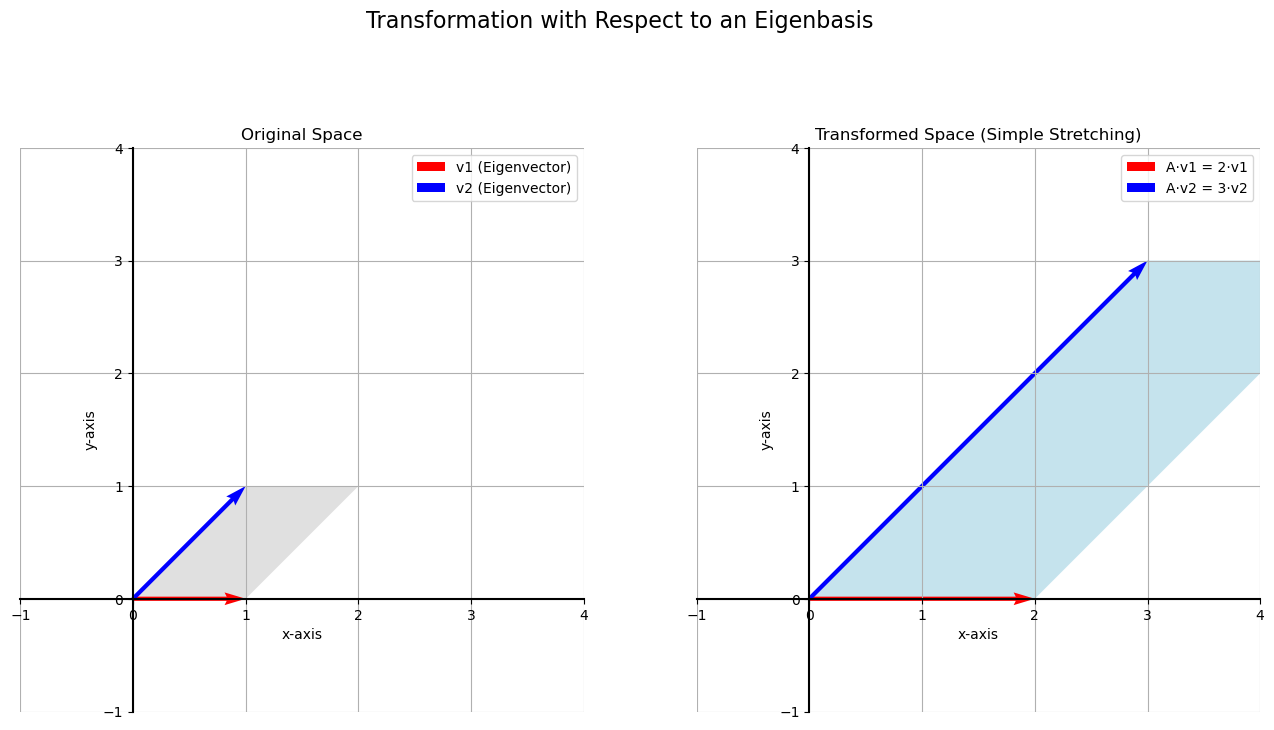

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the transformation matrix ---
A = np.array([[2, 1], [0, 3]])

# --- Define the eigenbasis vectors and the parallelogram they form ---
v1 = np.array([1, 0])
v2 = np.array([1, 1])
eigen_parallelogram = np.array([[0, 0], v1, v1 + v2, v2, [0, 0]])

# --- Apply the transformation ---
v1_transformed = A @ v1
v2_transformed = A @ v2
transformed_parallelogram = (A @ eigen_parallelogram.T).T

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Transformation with Respect to an Eigenbasis', fontsize=16, y=1.02)

# --- Plot 1: Original Space with Eigenbasis ---
ax1.fill(eigen_parallelogram[:, 0], eigen_parallelogram[:, 1], 'lightgray', alpha=0.7)
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', label='v1 (Eigenvector)')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v2 (Eigenvector)')
ax1.set_title('Original Space')

# --- Plot 2: Transformed Space ---
ax2.fill(transformed_parallelogram[:, 0], transformed_parallelogram[:, 1], 'lightblue', alpha=0.7)
ax2.quiver(0, 0, v1_transformed[0], v1_transformed[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'A·v1 = 2·v1')
ax2.quiver(0, 0, v2_transformed[0], v2_transformed[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'A·v2 = 3·v2')
ax2.set_title('Transformed Space (Simple Stretching)')

# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

---

## Eigenvectors and Eigenvalues

This special relationship gives rise to two of the most important concepts in linear algebra.

* **Eigenvectors:** These are the special, non-zero vectors that do not change their direction when a linear transformation is applied to them. They are only stretched or shrunk. In our example, `(1, 0)` and `(1, 1)` are eigenvectors of matrix A.

* **Eigenvalues:** An eigenvalue is the factor by which an eigenvector is stretched or shrunk. It is a scalar. In our example:
    * The eigenvalue corresponding to eigenvector `(1, 0)` is **2**.
    * The eigenvalue corresponding to eigenvector `(1, 1)` is **3**.

Finding the eigenvectors and eigenvalues of a matrix is tremendously useful because it allows us to understand the fundamental "stretching" action of a transformation, simplifying our calculations and providing deep insight into the matrix's properties.